In [51]:
import pandas as pd
import numpy as np  
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt


In [52]:
X = pd.read_csv(r"D:\Projects\EDA_analysis\LoanPredictionProblemNotebook\data_transformed.csv")
y = pd.read_csv(r"D:\Projects\EDA_analysis\LoanPredictionProblemNotebook\data_output.csv").values.ravel()

In [53]:
X.head()

,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Property_Area,TotalIncome_log,LoanAmount_log
0,1,0,0.0,1,0,360.0,1.0,3,8.674197,4.859812
1,1,1,1.0,1,0,360.0,1.0,1,8.714732,4.859812
2,1,1,0.0,1,1,360.0,1.0,3,8.006701,4.204693
3,1,1,0.0,0,0,360.0,1.0,3,8.505525,4.795791
4,1,0,0.0,1,0,360.0,1.0,3,8.699681,4.955827


In [54]:
y

array([1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,

In [55]:
#Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42,test_size=0.20, stratify=y)

In [56]:
#Fit scaleer only on training data
scaler = MinMaxScaler()
X_trained_scaled = scaler.fit_transform(X_train)

##Transform the test data
X_test_scaled = scaler.transform(X_test)


In [57]:
X_trained_scaled

array([[1.        , 0.        , 0.        , ..., 1.        , 0.14629808,
        0.15963929],
       [1.        , 1.        , 0.33333333, ..., 0.5       , 0.15276774,
        0.36579003],
       [1.        , 1.        , 0.66666667, ..., 0.        , 0.29940492,
        0.50770631],
       ...,
       [1.        , 1.        , 0.        , ..., 0.5       , 0.29954286,
        0.4419394 ],
       [0.        , 1.        , 0.        , ..., 0.5       , 0.28069931,
        0.47883809],
       [0.        , 1.        , 0.        , ..., 0.5       , 0.10952573,
        0.46214544]], shape=(491, 10))

In [58]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,ConfusionMatrixDisplay,precision_score, recall_score, f1_score,roc_auc_score,roc_curve

models  = {
          'Decision Tree': DecisionTreeClassifier(),
          'Logisitic Regression': LogisticRegression(),
          'Randon Forest': RandomForestClassifier(),
          'Adaboost'  : AdaBoostClassifier(),
          'Gradient Boostiing': GradientBoostingClassifier() ,
          'xgboost': XGBClassifier() 
}

model_list = []
accuraccy_trained_list =[]
f1_score_list = []
accuraccy_test_list = []

for i in range (len(list(models))):
          model = list(models.values())[i]
          model_name = list(models.keys())[i]
          model.fit(X_trained_scaled , y_train)  # Train model


          # Make Prediction
          y_train_pred  = model.predict(X_trained_scaled)
          y_test_pred = model.predict(X_test_scaled)

          ##Training set performance
          model_train_accuracy =  accuracy_score(y_train, y_train_pred)
          model_train_f1 =  f1_score(y_train, y_train_pred,average='weighted')
          model_train_precision =  precision_score(y_train, y_train_pred)
          model_train_recall =  recall_score(y_train, y_train_pred)
          model_train_rocauc_score = roc_auc_score(y_train, y_train_pred)
         
         
          ##Test set performance
          model_test_accuracy =  accuracy_score(y_test, y_test_pred)
          model_test_f1 =  f1_score(y_test, y_test_pred,average='weighted')
          model_test_precision =  precision_score(y_test, y_test_pred)
          model_test_recall =  recall_score(y_test, y_test_pred)
          model_test_rocauc_score = roc_auc_score(y_test, y_test_pred)

          print(list(models.keys())[i])

          print('Model performance for Training set')
          print('- Accuracy: {:.4f}'.format(model_train_accuracy))
          print('- F1 score: {:.4f}'.format(model_train_f1))

          print('- Precision: {:.4f}'.format(model_train_precision))
          print('- Recall: {:.4f}'.format(model_train_recall))
          print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))

          print('--------------------------------')

          print('Model performance for Test set')
          print('- Accuracy: {:.4f}'.format(model_test_accuracy))
          print('- F1 score: {:.4f}'.format(model_test_f1))

          print('- Precision: {:.4f}'.format(model_test_precision))
          print('- Recall: {:.4f}'.format(model_test_recall))
          print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))
          accuraccy_test_list.append(model_test_accuracy)
          model_list.append(model_name)
          f1_score_list.append(model_test_f1)
          accuraccy_trained_list.append(model_train_accuracy)



          print('='*35)
          print('\n')



Decision Tree
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
--------------------------------
Model performance for Test set
- Accuracy: 0.6667
- F1 score: 0.6750
- Precision: 0.7895
- Recall: 0.7059
- Roc Auc Score: 0.6424


Logisitic Regression
Model performance for Training set
- Accuracy: 0.7984
- F1 score: 0.7702
- Precision: 0.7807
- Recall: 0.9822
- Roc Auc Score: 0.6891
--------------------------------
Model performance for Test set
- Accuracy: 0.8537
- F1 score: 0.8404
- Precision: 0.8317
- Recall: 0.9882
- Roc Auc Score: 0.7704


Randon Forest
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
--------------------------------
Model performance for Test set
- Accuracy: 0.8293
- F1 score: 0.8257
- Precision: 0.8556
- Recall: 0.9059
- Roc Auc Score: 0.7819


Adaboost
Model performance for Training set
- Accuracy

In [59]:
pd.DataFrame(list(zip(model_list, accuraccy_trained_list, accuraccy_test_list, f1_score_list)), columns=['Model Name', 'Accuracy_Trained_Score', "Accuracy_Test_Score", "F1_Test_Score"]).sort_values(by=["Accuracy_Test_Score"],ascending=False)

,Model Name,Accuracy_Trained_Score,Accuracy_Test_Score,F1_Test_Score
1,Logisitic Regression,0.798371,0.853659,0.840441
3,Adaboost,0.802444,0.845528,0.835078
4,Gradient Boostiing,0.881874,0.837398,0.831488
2,Randon Forest,1.000000,0.829268,0.825696
5,xgboost,1.000000,0.772358,0.766482
0,Decision Tree,1.000000,0.666667,0.674997


In [60]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear'],  # works with l1 and l2
    'max_iter': [1000]
}

grid = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='f1')
grid.fit(X_trained_scaled, y_train)

print("Best Params:", grid.best_params_)
print("Best F1 Score:", grid.best_score_)


Best Params: {'C': 0.1, 'max_iter': 1000, 'penalty': 'l1', 'solver': 'liblinear'}
Best F1 Score: 0.8699456484348126


In [61]:
from sklearn.ensemble import RandomForestClassifier

# Hyperparameter grid
rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_grid = GridSearchCV(RandomForestClassifier(), rf_params, cv=5, scoring='f1', n_jobs=-1)
rf_grid.fit(X_trained_scaled, y_train)

print("Best Random Forest Params:", rf_grid.best_params_)
print(" Best F1 Score:", rf_grid.best_score_)


Best Random Forest Params: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
 Best F1 Score: 0.8707299621603027


In [62]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV


# Base estimator (weak learner)
base_estimator = DecisionTreeClassifier()

# Define AdaBoost model
adb = AdaBoostClassifier(estimator=base_estimator, random_state=42)

# Hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1],
    'estimator__max_depth': [1, 2, 3],
    'estimator__min_samples_split': [2, 5],
}

# GridSearch
grid_search = GridSearchCV(estimator=adb, param_grid=param_grid, 
                           cv=5, scoring='f1', n_jobs=-1, verbose=1)

# Fit
grid_search.fit(X_trained_scaled, y_train)

print("Best Random Forest Params:", rf_grid.best_params_)
print(" Best F1 Score:", rf_grid.best_score_)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
Best Random Forest Params: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
 Best F1 Score: 0.8707299621603027


In [63]:
models  = {
          'Logisitic Regression': LogisticRegression(C = 0.1, max_iter =  1000, penalty = "l1" , solver = "liblinear"),
          'Randon Forest': RandomForestClassifier(max_depth = 5, min_samples_leaf = 1, min_samples_split = 5, n_estimators = 100),
}
for i in range (len(list(models))):
          model = list(models.values())[i]
          model.fit(X_trained_scaled , y_train)  # Train model


          # Make Prediction
          y_train_pred  = model.predict(X_trained_scaled)
          y_test_pred = model.predict(X_test_scaled)

          ##Training set performance
          model_train_accuracy =  accuracy_score(y_train, y_train_pred)
          model_train_f1 =  f1_score(y_train, y_train_pred,average='weighted')
          model_train_precision =  precision_score(y_train, y_train_pred)
          model_train_recall =  recall_score(y_train, y_train_pred)
          model_train_rocauc_score = roc_auc_score(y_train, y_train_pred)
         
         
          ##Test set performance
          model_test_accuracy =  accuracy_score(y_test, y_test_pred)
          model_test_f1 =  f1_score(y_test, y_test_pred,average='weighted')
          model_test_precision =  precision_score(y_test, y_test_pred)
          model_test_recall =  recall_score(y_test, y_test_pred)
          model_test_rocauc_score = roc_auc_score(y_test, y_test_pred)

          print(list(models.keys())[i])

          print('Model performance for Training set')
          print('- Accuracy: {:.4f}'.format(model_train_accuracy))
          print('- F1 score: {:.4f}'.format(model_train_f1))

          print('- Precision: {:.4f}'.format(model_train_precision))
          print('- Recall: {:.4f}'.format(model_train_recall))
          print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))

          print('--------------------------------')

          print('Model performance for Test set')
          print('- Accuracy: {:.4f}'.format(model_test_accuracy))
          print('- F1 score: {:.4f}'.format(model_test_f1))

          print('- Precision: {:.4f}'.format(model_test_precision))
          print('- Recall: {:.4f}'.format(model_test_recall))
          print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))


          print('='*35)
          print('\n')

Logisitic Regression
Model performance for Training set
- Accuracy: 0.7984
- F1 score: 0.7702
- Precision: 0.7807
- Recall: 0.9822
- Roc Auc Score: 0.6891
--------------------------------
Model performance for Test set
- Accuracy: 0.8537
- F1 score: 0.8404
- Precision: 0.8317
- Recall: 0.9882
- Roc Auc Score: 0.7704


Randon Forest
Model performance for Training set
- Accuracy: 0.8106
- F1 score: 0.7870
- Precision: 0.7919
- Recall: 0.9822
- Roc Auc Score: 0.7086
--------------------------------
Model performance for Test set
- Accuracy: 0.8455
- F1 score: 0.8351
- Precision: 0.8367
- Recall: 0.9647
- Roc Auc Score: 0.7718




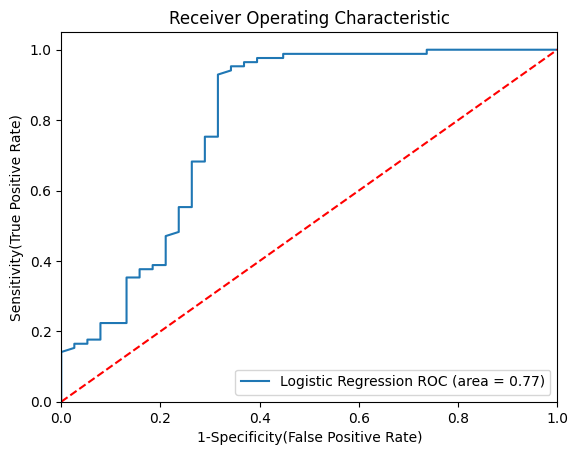

In [64]:
###Plot ROC AUC Curve
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score,roc_curve
plt.figure()

##Add the models to list that yu want to view on ROC plot
auc_models = [
          {
                    'label': "Logistic Regression",
                    'model': LogisticRegression(C = 0.1, max_iter =  1000, penalty = "l1" , solver = "liblinear"),
                    'auc':  0.7704
          }
]

##create a loop through all model
for algo in auc_models:
          model = algo['model'] #select the model
          model.fit(X_train, y_train) #train the model
# Compute False positive rate, and True positive rate
          fpr, tpr,thresholds = roc_curve(y_test,model.predict_proba(X_test)[:,1])
# Calculate Area under th curve to display on plot
          plt.plot(fpr,tpr,label = "%s ROC (area = %0.2f)" % (algo['label'], algo['auc']))
#Custom settings for the plot
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig("auc.png")
plt.show() 

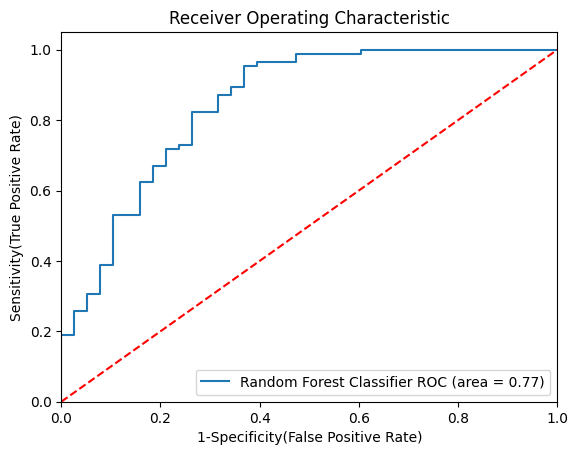

In [65]:
###Plot ROC AUC Curve
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score,roc_curve
plt.figure()

##Add the models to list that yu want to view on ROC plot
auc_models = [
          {
                    'label': "Random Forest Classifier",
                    'model':  RandomForestClassifier(max_depth = 5, min_samples_leaf = 1, min_samples_split = 5, n_estimators = 100),
                    'auc':  0.7714
          }
]

##create a loop through all model
for algo in auc_models:
          model = algo['model'] #select the model
          model.fit(X_train, y_train) #train the model
# Compute False positive rate, and True positive rate
          fpr, tpr,thresholds = roc_curve(y_test,model.predict_proba(X_test)[:,1])
# Calculate Area under th curve to display on plot
          plt.plot(fpr,tpr,label = "%s ROC (area = %0.2f)" % (algo['label'], algo['auc']))
#Custom settings for the plot
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig("auc.png")
plt.show() 

####  Recommendation:
We recommend Logistic Regression as the primary model for this loan prediction task because:

It achieves the highest recall (98.8%), which is crucial in minimizing missed approvals.

It maintains strong general performance on accuracy and F1 score.

It’s interpretable, which is essential for financial applications where decisions need to be explainable.

Use Case: Ideal for production deployment where regulatory transparency and fairness are critical.